In [1]:
from src.neural_networks.get_data import get_tf_data, stack_1d_features, normalize_1d_features_with_mean_std
from src.neural_networks.nn_forecast import NNForecast
from src.visualization.twcrpss_plot import make_twcrpss_plot_tf
from src.visualization.brier_score import make_brier_skill_plot_tf
from src.visualization.pit import make_cpit_diagram_tf

import tensorflow as tf
import numpy as np

2024-05-07 08:03:32.649991: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-07 08:03:32.652329: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-07 08:03:32.683467: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-07 08:03:36.645578: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
filepath = '/net/pc200239/nobackup/users/hakvoort/models/conv_nn/test_crps'

model_crps = NNForecast.my_load(filepath)

filepath2 = '/net/pc200239/nobackup/users/hakvoort/models/conv_nn/test_twcrps_12_2_0.1'

model_twcrps = NNForecast.my_load(filepath2)

filepath3 = '/net/pc200239/nobackup/users/hakvoort/models/conv_nn/test_twcrps_12_2_0.05'

model_twcrps2 = NNForecast.my_load(filepath3)

filepath3 = '/net/pc200239/nobackup/users/hakvoort/models/conv_nn/test_twcrps_12_2_0.3'

model_twcrps3 = NNForecast.my_load(filepath3)

ValueError: File format not supported: filepath=/net/pc200239/nobackup/users/hakvoort/models/conv_nn/test_crps/nnmodel/weights. Keras 3 only supports V3 `.keras` and `.weights.h5` files, or legacy V1/V2 `.h5` files.

In [3]:

features_names = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

features_names_dict = {name: 1 for name in features_names}

features_names_dict['wind_speed'] = 15

ignore = ['229', '285', '323']

test_data = get_tf_data([3], features_names_dict, ignore=ignore)

test_data = test_data.map(lambda x, y: stack_1d_features(x, y))

test_data = normalize_1d_features_with_mean_std(test_data, model_crps.features_1d_mean, model_crps.features_1d_std)

test_data = test_data.batch(len(test_data))



In [ ]:


print(model_crps.CRPS(test_data, 10000))
print(model_twcrps.CRPS(test_data, 10000))

244/244 [==============================] - 2s 4ms/step
tf.Tensor(0.843072, shape=(), dtype=float32)
244/244 [==============================] - 1s 4ms/step
tf.Tensor(0.8386854, shape=(), dtype=float32)


In [4]:
mymodels = {'twcrps': model_twcrps, 'twcrps2': model_twcrps2, 'twcrps3': model_twcrps3}

244/244 [==============================] - 1s 4ms/step


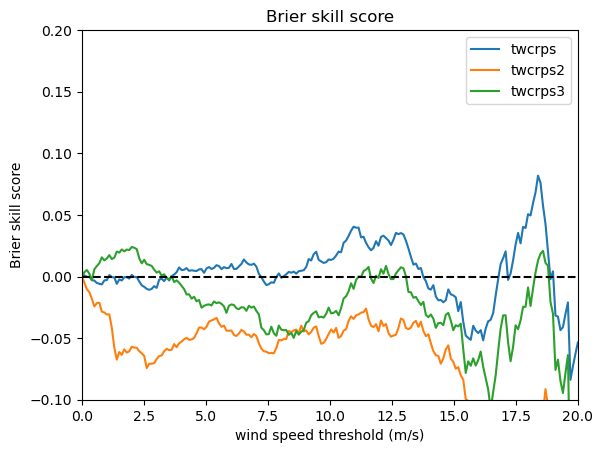

In [7]:
values = np.linspace(0, 20, 200)
ylim = [-0.1, 0.2]
make_brier_skill_plot_tf(model_crps, mymodels, test_data, values, ylim)



244/244 [==============================] - 1s 4ms/step


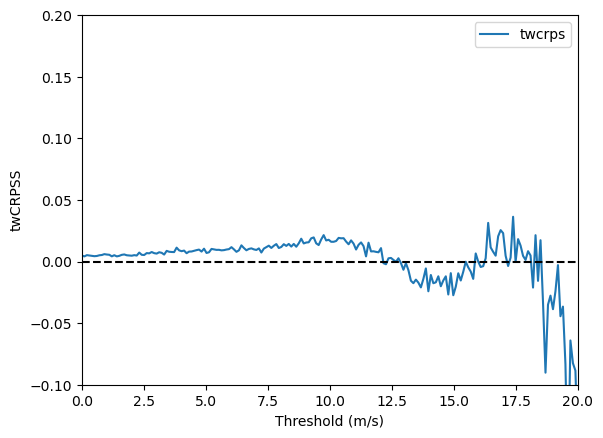

In [8]:
make_twcrpss_plot_tf(model_crps, mymodels, test_data, values, ylim)

In [5]:
t = 0 


make_cpit_diagram_tf(mymodels, test_data, t, model_crps)

244/244 [==============================] - 1s 4ms/step


TypeError: '_BatchDataset' object is not subscriptable